## Business Context

This dataset consists of apps needed permissions during installation and run-time. We collect apps from three different sources: google play, third-party apps and malware dataset. This file contains more than 30,000 Android apps. features extracted at the time of installation and execution. One file contains the name of the features and others contain a .apk file corresponding to extracted permissions with respective packages. Apps are collected from Google's play store, hiapk, app china, Android, mumayi , gfan slideme, and pandaapp. These .apk files collected from the last three years continuously contain 81 distinct malware families. But, Here you are only supposed to predict whether the app is benign(0) or malware(1).

## Know The Data & Data Wrangling

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
path = 'data/ANDRIOD AUTHENTICITY PREDICTION.csv' # path
df = pd.read_csv(path) # data loading

In [3]:
# First view
pd.set_option('display.max_columns',None) # Display entire columns
pd.set_option('display.max_rows',None) # Display entire rows
df.head() # First five rows

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delet

In [4]:
print('shape : ',df.shape) # display shape of the df
print()
print('duplicate counts : ',df.duplicated().sum()) # display duplicate counts
print()
print('columns :')
print(list(df.columns)) # display null counts

shape :  (29999, 184)

duplicate counts :  2689

columns :
['App', 'Package', 'Category', 'Description', 'Rating', 'Number of ratings', 'Price', 'Related apps', 'Dangerous permissions count', 'Safe permissions count', 'Default : Access DRM content. (S)', 'Default : Access Email provider data (S)', 'Default : Access all system downloads (S)', 'Default : Access download manager. (S)', 'Default : Advanced download manager functions. (S)', 'Default : Audio File Access (S)', 'Default : Install DRM content. (S)', 'Default : Modify Google service configuration (S)', 'Default : Modify Google settings (S)', 'Default : Move application resources (S)', 'Default : Read Google settings (S)', 'Default : Send download notifications. (S)', 'Default : Voice Search Shortcuts (S)', 'Default : access SurfaceFlinger (S)', 'Default : access checkin properties (S)', 'Default : access the cache filesystem (S)', 'Default : access to passwords for Google accounts (S)', 'Default : act as an account authenticator

There are 2689 duplicates so I am going to drop duplicates

In [5]:
# Null/Missing count for each column
df.drop_duplicates(inplace=True) # dropping duplicates
df.isna().sum() # display null/missing count

App                                                                                         1
Package                                                                                     0
Category                                                                                    0
Description                                                                                 3
Rating                                                                                      0
Number of ratings                                                                           0
Price                                                                                       0
Related apps                                                                              720
Dangerous permissions count                                                               201
Safe permissions count                                                                      0
Default : Access DRM content. (S)                           

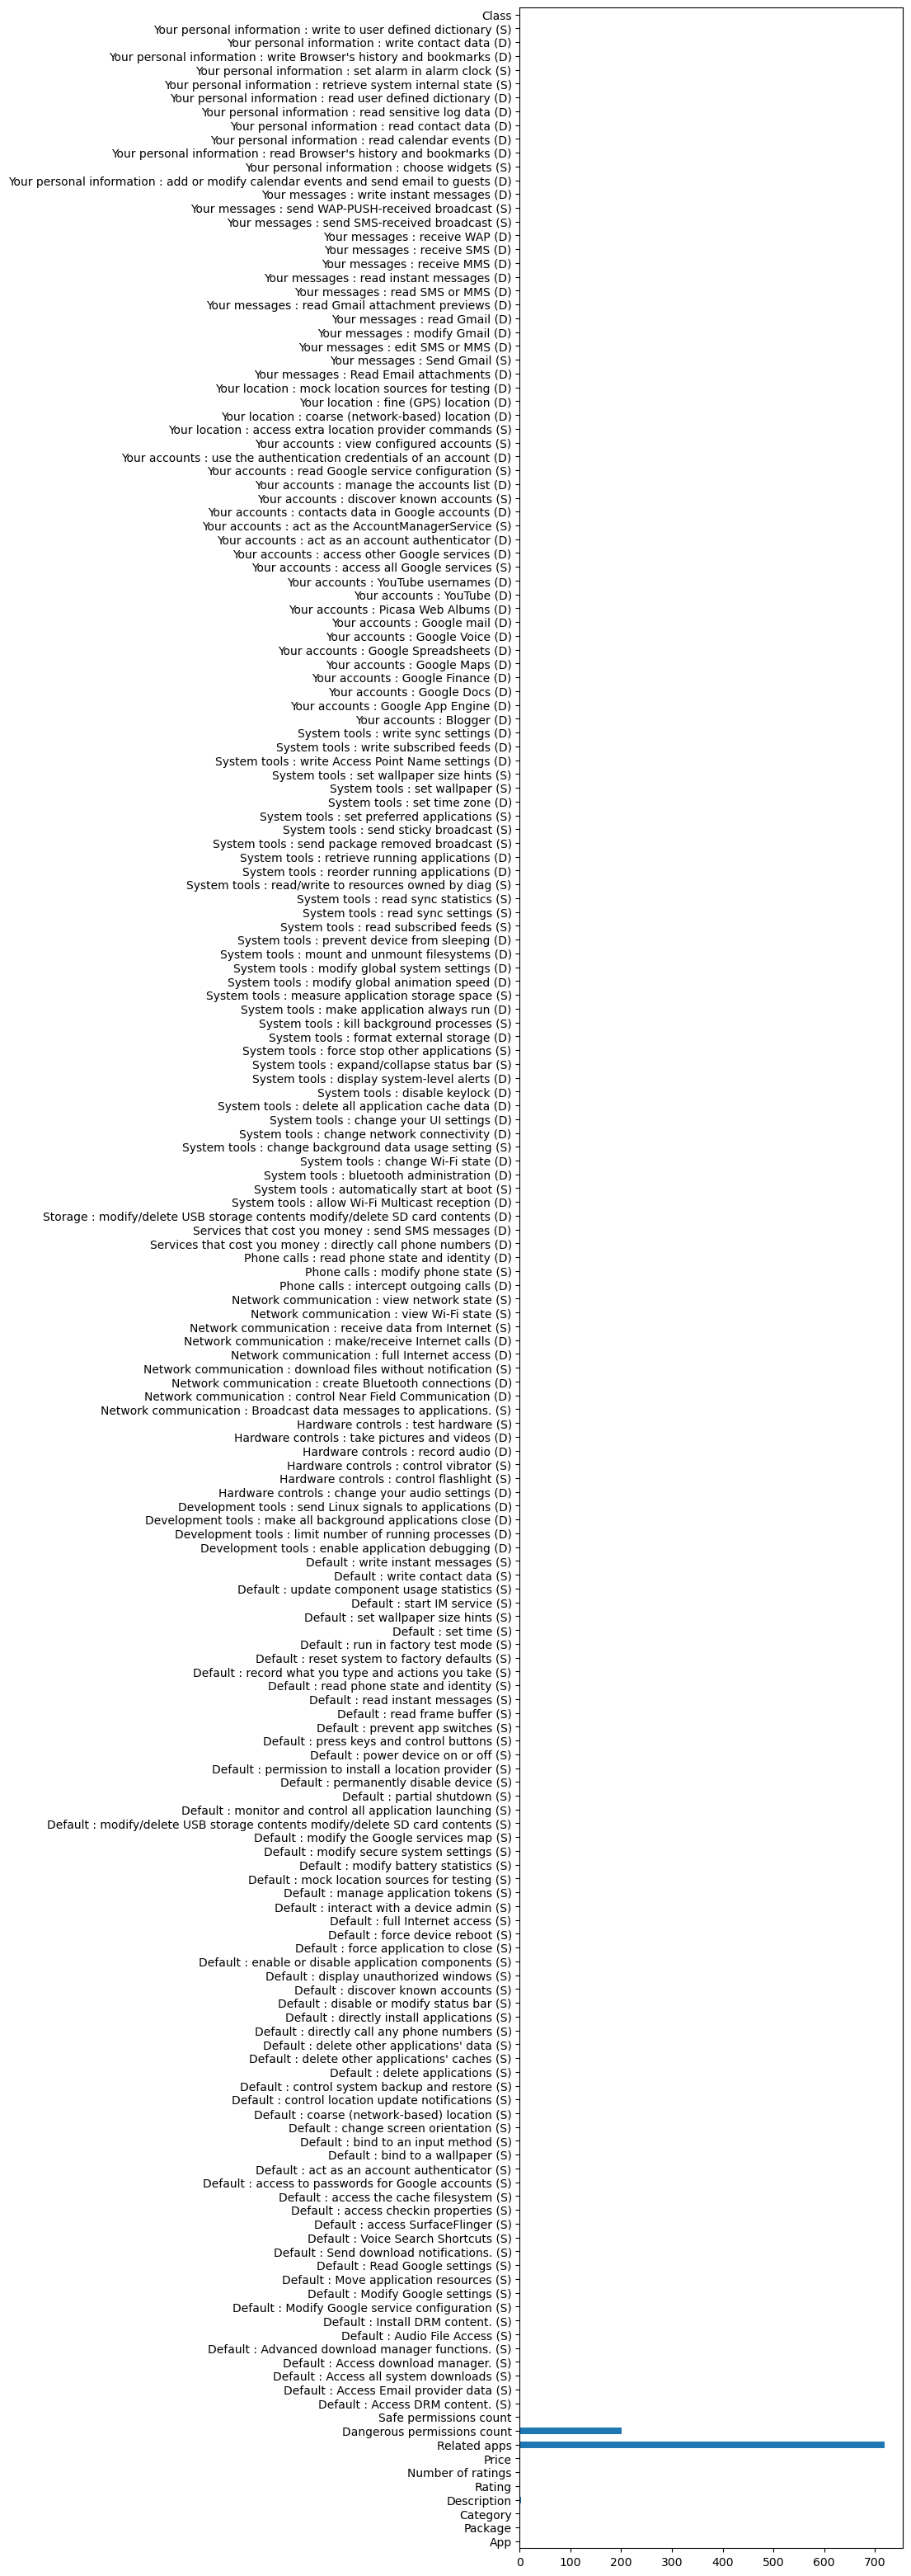

In [6]:
plt.figure(figsize=(6,40))
df.isna().sum().plot.barh()
plt.show()

1. "Related apps" contains 720 null values and in this project I am not performing nlp task therefore the column "Related apps" is not needed.
2. "Dangerous permissions count" has 201 missing/null values therefore I am going to impute it by mean.

In [7]:
# Unique count
df.drop(['Related apps', 'Description'], axis=1, inplace=True) # drop the column Related apps
df["Dangerous permissions count"] = df["Dangerous permissions count"].fillna(round(df['Dangerous permissions count'].mean(),1)) # Impute nan with mean
df.dropna(inplace=True) # drop nan because only 1 row contains nan.
df.nunique() # display number of unique values for each column

App                                                                                       22823
Package                                                                                   23484
Category                                                                                     30
Rating                                                                                       42
Number of ratings                                                                          5312
Price                                                                                       425
Dangerous permissions count                                                                  28
Safe permissions count                                                                       16
Default : Access DRM content. (S)                                                             2
Default : Access Email provider data (S)                                                      2
Default : Access all system downloads (S

In [8]:
for col in df.columns:
    if len(df[col].unique()) < 100:
        print('Unique values in column : ',col)
        print(df[col].unique())
        print()

Unique values in column :  Category
['Business' 'Brain & Puzzle' 'Cards & Casino' 'Libraries & Demo'
 'Lifestyle' 'Personalization' 'Arcade & Action' 'Social'
 'Health & Fitness' 'Entertainment' 'Casual' 'Media & Video' 'Finance'
 'Music & Audio' 'Books & Reference' 'Tools' 'Education' 'Shopping'
 'Travel & Local' 'Sports' 'Racing' 'Productivity' 'Communication'
 'Transportation' 'Comics' 'Medical' 'Sports Games' 'Photography'
 'News & Magazines' 'Weather']

Unique values in column :  Rating
[3.1 4.3 4.1 3.6 0.  4.5 4.4 4.7 4.2 3.9 4.6 4.8 3.2 2.9 3.5 3.7 4.  5.
 1.  4.9 2.8 3.3 3.4 2.3 1.9 2.7 3.8 3.  2.5 2.2 1.5 2.  2.6 2.4 1.7 1.6
 2.1 1.8 1.4 1.3 1.2 1.1]

Unique values in column :  Dangerous permissions count
[ 7.  3.  1.  0.  2.  5.  6.  4. 12.  9. 19. 11.  8. 17. 10. 15. 28. 21.
 16. 14. 20. 13. 22. 18. 23. 30. 26. 29.]

Unique values in column :  Safe permissions count
[ 1  2  0  3  4  6  8  5 10  7 11 14  9 12 16 13]

Unique values in column :  Default : Access DRM content. (S

There are few columns that contains only single unique values for example column "Default : permanently disable device (S)" contains only 0 that is a constant and you know constant values are not good for a Machine learning model. Therefore I need to handle it.""

In [9]:
# getting columns which has single value
cols_with_constant = []
for col in df.columns:
    if (df[col].nunique()==1):
        cols_with_constant.append(col)

In [10]:
print('shape before dropping columns with single values : ', df.shape)
print('# of columns with constant values : ',len(cols_with_constant))
print()
print('Columns with constant values :')
print(cols_with_constant)
print()
print('dropping columns with single values')
df.drop(cols_with_constant, axis=1, inplace=True)
print('Successfully dropped')
print('shape after dropping columns with single values : ', df.shape)

shape before dropping columns with single values :  (27309, 182)
# of columns with constant values :  22

Columns with constant values :
['Default : Access all system downloads (S)', 'Default : Modify Google service configuration (S)', 'Default : access to passwords for Google accounts (S)', 'Default : act as an account authenticator (S)', 'Default : coarse (network-based) location (S)', 'Default : discover known accounts (S)', 'Default : full Internet access (S)', 'Default : mock location sources for testing (S)', 'Default : modify/delete USB storage contents modify/delete SD card contents (S)', 'Default : permanently disable device (S)', 'Default : read instant messages (S)', 'Default : reset system to factory defaults (S)', 'Default : run in factory test mode (S)', 'Default : set wallpaper size hints (S)', 'Default : start IM service (S)', 'Default : write contact data (S)', 'Default : write instant messages (S)', 'Network communication : download files without notification (S)', 'S

In [11]:
# Data types
df.dtypes

App                                                                                        object
Package                                                                                    object
Category                                                                                   object
Rating                                                                                    float64
Number of ratings                                                                           int64
Price                                                                                     float64
Dangerous permissions count                                                               float64
Safe permissions count                                                                      int64
Default : Access DRM content. (S)                                                           int64
Default : Access Email provider data (S)                                                    int64
Default : Access dow

In [12]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : set time (S),Default : update component usage statistics (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card contents (D),System tools : allow Wi-Fi Multicast reception (D),System tools : automatically start at boot (S),System tools : bluetooth administration (D),System tools : change Wi-Fi state (D),System tools : change network connectivity (D),System tools : change your UI settings (D),System tools : delete all application cache data (D),System tools : disable keylock (D),System tools : display system-level alerts (D),System tools : expand/collapse status bar (S),System tools : force stop other applications (S),System tools : format external storage (D),System tools : kill background processes (S),System tools : make application always run (D),System tools : measure application storage space (S),System tools : modify global animation speed (D),System tools : modify global system settings (D),System t

***Know The Data***
1. Initial shape of the dataset was :  (29999, 184)
2. 
duplicate counts :  26
3. nan values in App : 1, Description : 3, and Related apps : 720
4. All the columns are has correct data type
5. Final shape of the dataset after dropping duplicates and imputin nan : (27309, 160)
6. Rating has not much difference between mean and median therefore very less chance of outliers existance.
7. Number of ratings has higher difference between mean and median so there might be some outliers present.
8. Price has higher difference between mean and median there might be some outliers too.9


## EDA